In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn import preprocessing
from keras.preprocessing import image
from sklearn.model_selection import train_test_split

In [3]:
base_dir = '/content/drive/MyDrive/shot/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

In [4]:
BATCH_SIZE = 5
IMG_SIZE = (180, 180)

train = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 100 files belonging to 2 classes.


In [5]:
validation = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 30 files belonging to 2 classes.


In [6]:
VGG16_model = Sequential()

pretrained_model= tf.keras.applications.vgg16.VGG16(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

VGG16_model.add(pretrained_model)

58889256/58889256 [==============================] - 0s 0us/step


In [7]:
VGG16_model.add(tf.keras.layers.Flatten())
VGG16_model.add(tf.keras.layers.Dense(512, activation='relu'))
VGG16_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [8]:
VGG16_model.compile(tf.keras.optimizers.Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

history = VGG16_model.fit(train, validation_data=validation, epochs=50)

Epoch 1/50


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


20/20 [==============================] - 56s 2s/step - loss: 2.5293 - accuracy: 0.5400 - val_loss: 1.9619 - val_accuracy: 0.6667
Epoch 2/50
20/20 [==============================] - 39s 2s/step - loss: 0.5781 - accuracy: 0.8200 - val_loss: 1.7500 - val_accuracy: 0.5333
Epoch 3/50
20/20 [==============================] - 39s 2s/step - loss: 0.2527 - accuracy: 0.8900 - val_loss: 1.4641 - val_accuracy: 0.5000
Epoch 4/50
20/20 [==============================] - 39s 2s/step - loss: 0.1057 - accuracy: 0.9800 - val_loss: 1.6688 - val_accuracy: 0.6333
Epoch 5/50
20/20 [==============================] - 39s 2s/step - loss: 0.0377 - accuracy: 0.9900 - val_loss: 1.9341 - val_accuracy: 0.6000
Epoch 6/50
20/20 [==============================] - 38s 2s/step - loss: 0.0193 - accuracy: 1.0000 - val_loss: 1.6032 - val_accuracy: 0.6000
Epoch 7/50
20/20 [==============================] - 43s 2s/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 1.7109 - val_accuracy: 0.6667
Epoch 9/50
20/20 [=============

Text(0.5, 1.0, 'Training and Validation Accuracy (VGG16)')

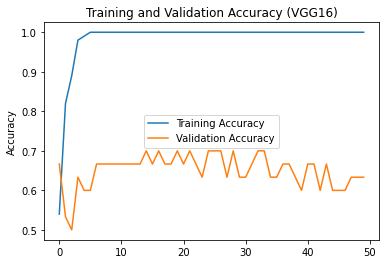

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='center')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (VGG16)')

In [10]:
loss, accuracy = VGG16_model.evaluate(validation)
print('Test accuracy :', accuracy)

6/6 [==============================] - 9s 1s/step - loss: 1.8506 - accuracy: 0.6333
Test accuracy : 0.6333333253860474


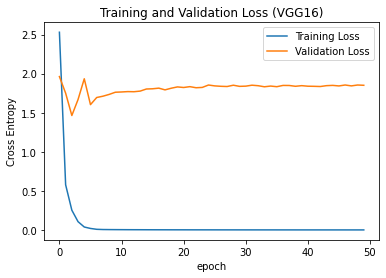

In [11]:
loss = history.history['loss']
val_loss = history.history['val_loss']


plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss (VGG16)')
plt.xlabel('epoch')
plt.show()